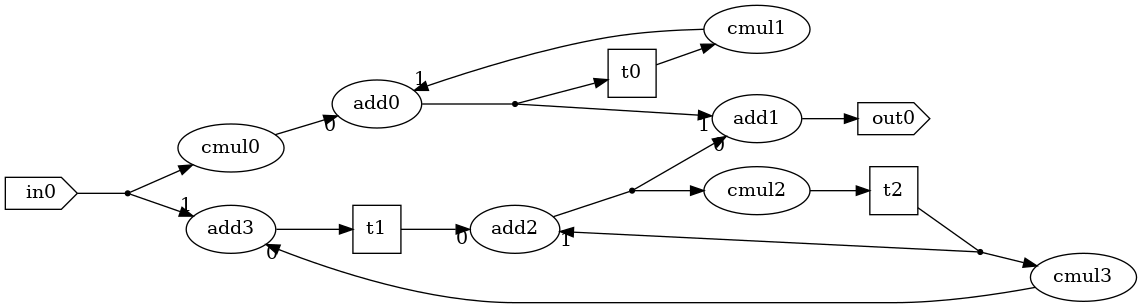

In [4]:
from b_asic.core_operations import Addition, ConstantMultiplication, SymmetricTwoportAdaptor
from b_asic.signal_flow_graph import SFG
from b_asic.special_operations import Delay, Input, Output
from b_asic.sfg_generators import wdf_allpass

a = ConstantMultiplication(0)
b = ConstantMultiplication(0)
c = ConstantMultiplication(0)
d = ConstantMultiplication(0)

#a.graph_id = "a"
#b.graph_id = "b"
#c.graph_id = "c"
#d.graph_id = "d"

x = Input()
y = Output()

v0 = Delay()
v1 = Delay()
v2 = Delay()

# upper
a <<= v1
b <<= x
add0 = b + a
v1 <<= add0

# lower
add1 = c + x
v0 <<= add1
add2 = v0 + v2
c <<= v2
v2 <<= d
d <<= add2
add3 = add2 + add0

y <<= add3

#add0 = b*x + a*v1
#add1 = x + c*v2*d
#add2 = add1*v0 + v2
#add3 = add2 + add0

sfg = SFG([x], [y])
sfg

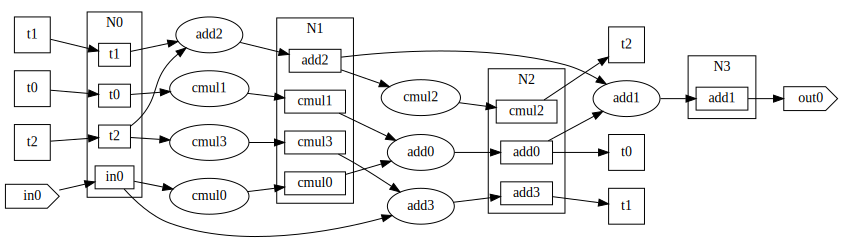

In [5]:
sfg.precedence_graph

(<class 'b_asic.scheduler_gui.scheduler_item.SchedulerItem'>,
 <class 'b_asic.scheduler_gui.scheduler_event.SchedulerEvent'>,
 <class 'PyQt5.QtWidgets.QGraphicsItemGroup'>,
 <class 'PyQt5.QtWidgets.QGraphicsItem'>,
 <class 'sip.wrapper'>,
 <class 'sip.simplewrapper'>,
 <class 'object'>)
schedule.move_operation('cmul2', 1)
schedule.move_y_location('cmul2', 5, True)
schedule.move_operation('out0', 2)
schedule.move_operation('add1', 2)
schedule.move_y_location('out0', 8, False)
schedule.move_operation('out0', 1)
schedule.move_operation('add3', 1)
schedule.move_y_location('add3', 7, True)
schedule.move_operation('cmul3', 1)
schedule.move_operation('add2', 1)
schedule.move_operation('add3', 1)
schedule.move_y_location('add3', 6, True)
schedule.move_operation('add0', 1)
schedule.move_operation('add0', -1)
schedule.move_operation('add3', -1)
schedule.move_operation('add0', 1)
schedule.move_operation('add1', -1)
schedule.move_operation('add1', 1)
schedule.move_operation('out0', -1)
schedule.mo

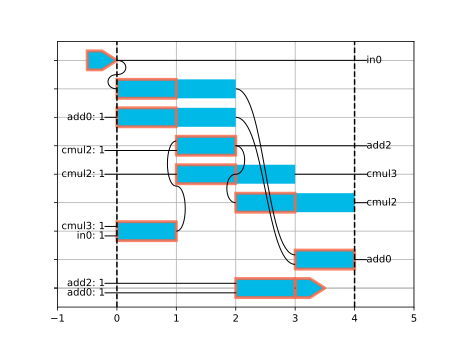

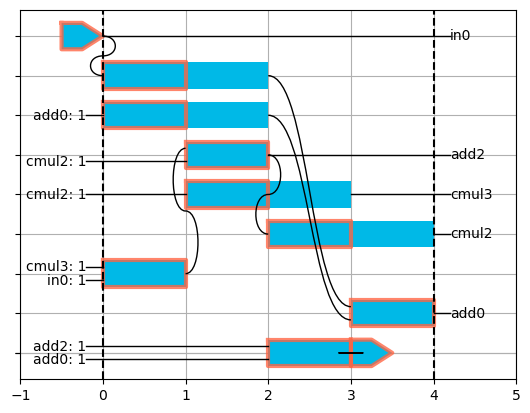

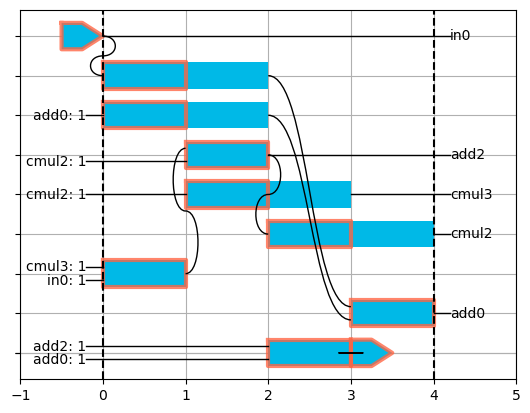

In [7]:
from b_asic.schedule import Schedule 
from b_asic.core_operations import Addition, ConstantMultiplication

sfg.set_latency_of_type(Addition.type_name(), 1)
sfg.set_execution_time_of_type(Addition.type_name(), 1)
sfg.set_latency_of_type(ConstantMultiplication.type_name(), 2)
sfg.set_execution_time_of_type(ConstantMultiplication.type_name(), 1)

schedule = Schedule(sfg, cyclic=True)
schedule.edit()